# "PERBANDINGAN HASIL KLASIFIKASI SENTIMEN KEUANGAN MENGGUNAKAN ALGORITMA SVM, NAIVE BAYES DAN RANDOM FOREST" #

- Nama  : Dive Oktabid Fikhri
- NIM   : A11.2022.14202
- Kelas : A11.4419
- Pembelajaran Mesin (Machine Learning)


## Ringkasan Dan Permasalahan Project 

### **Ringkasan**

Project ini bertujuan untuk membangun dan membandingkan model analisis sentimen menggunakan tiga algoritma pembelajaran mesin yaitu Support Vector Machine (SVM), Naive Bayes (NB) dan Random Forest (RF). Analisis sentimen adalah proses mengidentifikasi dan mengkategorikan opini yang dinyatakan dalam sebuah teks untuk menentukan apakah sikap penulis terhadap suatu topik adalah positif, negatif, atau netral. Melalui project ini, diharapkan dapat diperoleh model yang efektif dalam mengklasifikasikan sentimen teks, yang dapat digunakan dalam berbagai aplikasi seperti analisis ulasan produk, survei kepuasan pelanggan, dan monitoring media sosial.

### **Permasalahan Project**

Permasalahan yang dialami pada saat project ini dilakukan yaitu : 

**Pemilihan Algoritma yang Tepat:**
- Setiap algoritma machine learning memiliki karakteristik dan performa yang berbeda tergantung pada jenis data dan tujuan analisis. Memilih algoritma yang paling tepat antara SVM, Naive Bayes, dan Random Forest membutuhkan evaluasi yang cermat untuk menentukan mana yang memberikan hasil terbaik untuk klasifikasi sentimen.

**Overfitting dan Underfitting:**
- Beberapa ulasan mungkin tidak mengandung informasi yang cukup untuk menentukan sentimen secara akurat. Misalnya, ulasan yang terlalu singkat atau ambigu bisa menyebabkan kesulitan dalam analisis sentimen.

**Kualitas Data:**
- Dataset yang digunakan mungkin memiliki berbagai masalah seperti teks yang tidak lengkap dan label yang tidak konsisten. Teks yang tidak relevan atau tidak bersih dapat mengganggu proses pemodelan dan menghasilkan prediksi yang tidak akurat.

**Metrik Evaluasi yang Tepat:**
- Selain akurasi, penting untuk mempertimbangkan metrik lain seperti precision, recall, dan F1 score untuk mendapatkan gambaran yang lebih komprehensif tentang performa model. Metrik ini membantu dalam memahami trade-off antara berbagai aspek performa model.

## Tujuan Yang Ingin Dicapai 

Tujuan yang ingin dicapai pada project ini adalah sebagai berikut :

- Mengembangkan Model Analisis Sentimen:

*Membuat dan melatih model analisis sentimen menggunakan tiga algoritma pembelajaran mesin: Support Vector Machine (SVM), Naive Bayes (NB), dan Random Forest (RF).

*Meningkatkan kemampuan dalam mengklasifikasikan teks ke dalam kategori sentimen positif, negatif, atau netral.

- Membandingkan Performa Model:

*Melakukan evaluasi dan perbandingan performa dari ketiga model (SVM, NB, dan RF) menggunakan metrik evaluasi seperti akurasi, precision, recall, dan F1 score.

*Mengidentifikasi kekuatan dan kelemahan masing-masing algoritma dalam konteks analisis sentimen.

- Memilih Model Terbaik:

*Menentukan model yang paling efektif dan efisien dalam melakukan klasifikasi sentimen berdasarkan hasil evaluasi performa.

*Menggunakan model terbaik untuk aplikasi nyata dalam berbagai domain seperti analisis ulasan produk, survei kepuasan pelanggan, dan monitoring media sosial.


# ALUR DALAM BENTUK BAGAN

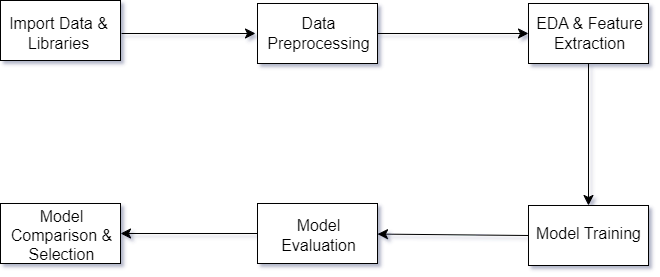

# Penjelasan Dataset

Dataset yang digunakan dalam proyek ini berisi berbagai kalimat yang dikategorikan berdasarkan sentimen yang terkait. Dataset ini digunakan untuk menganalisis sentimen dari berbagai pernyataan yang diberikan. Dataset mencakup dua kolom utama sebagai berikut:

Sentence: Kolom ini berisi teks dari berbagai pernyataan atau kalimat yang dianalisis.
Sentiment: Kolom ini menunjukkan sentimen dari pernyataan tersebut. Sentimen dikategorikan sebagai "positive", "negative", atau "neutral".

Label Sentimen
Dalam dataset ini, sentimen dilabelkan berdasarkan konteks dan isi dari pernyataan sebagai berikut:

- Sentimen Negatif: Diberikan pada pernyataan yang mencerminkan ketidakpuasan atau pandangan negatif terhadap subjek yang dibahas, seperti keluhan atau kritik terhadap sesuatu.

Contoh Ulasan: "$ESI on lows, down $1.50 to $2.50 BK a real problem.", "The new policy has caused more issues than it solved."

- Sentimen Netral: Diberikan pada pernyataan yang menunjukkan pandangan netral atau objektif, yang tidak mencerminkan kepuasan atau ketidakpuasan yang jelas terhadap subjek yang dibahas.

Contoh Ulasan: "According to the Finnish-Russian Chamber of Commerce, the new trade agreements are under review.", "The report stated that the company met its quarterly targets."

- Sentimen Positif: Diberikan pada pernyataan yang mencerminkan kepuasan atau pandangan positif terhadap subjek yang dibahas, seperti pujian atau apresiasi terhadap sesuatu.

Contoh Ulasan: "The GeoSolutions technology will leverage benefits for both companies.", "For the last quarter of 2010, Componenta's net sales increased significantly."

- Dengan melakukan analisis sentimen pada dataset ini, kita dapat memperoleh wawasan berharga yang dapat digunakan untuk meningkatkan kualitas layanan, produk, atau kebijakan yang diulas dalam pernyataan-pernyataan tersebut.

**IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import nbformat as nbf
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import warnings
warnings.filterwarnings("ignore")

**LOAD DATASET**

In [2]:
data = pd.read_csv('C:/Semester 4/Pembelajaran Mesin/UAS ML/data.csv')
data.head()
print(f"Dataset shape: {data.shape}")

Dataset shape: (5842, 2)


**PREPROCESSING TEXT**

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['Processed_Text'] = data['Sentence'].apply(preprocess_text)
data.drop(columns=['Sentence'], inplace=True)
data.to_csv('cleaned_dataset.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adive\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Exploratory Data Analysis (EDA)

**Visualisasi Distribusi Sentimen**

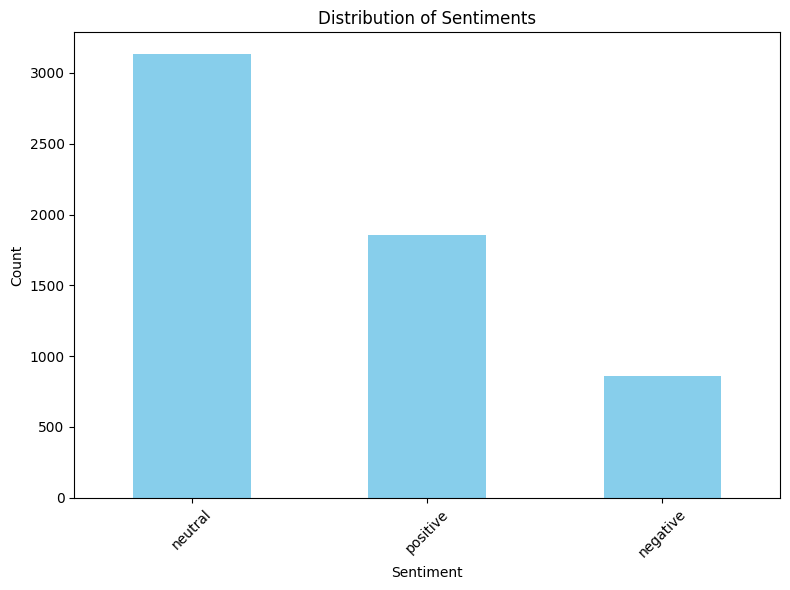

In [4]:
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)


**Visualisasi Distribusi Panjang Teks**

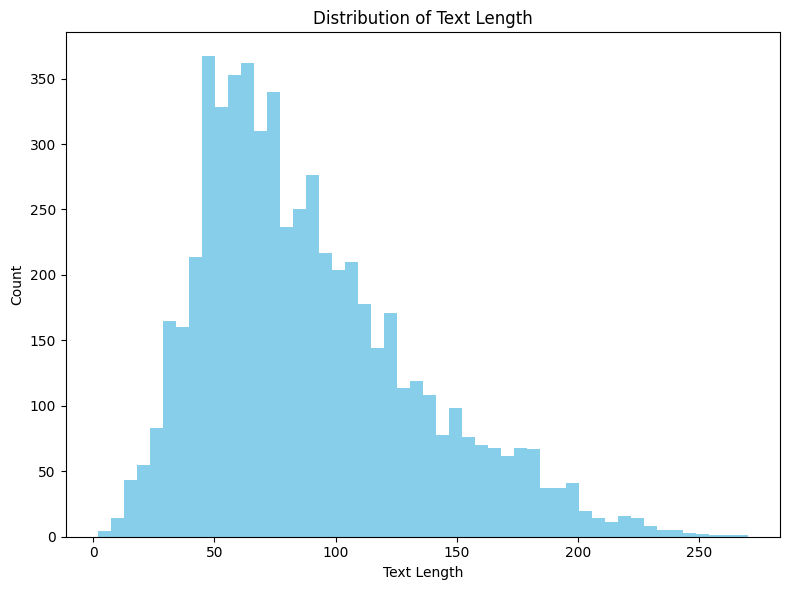

In [6]:
data['Text_Length'] = data['Processed_Text'].apply(len)
plt.figure(figsize=(8, 6))
data['Text_Length'].plot(kind='hist', bins=50, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Menampilkan Contoh Teks Berdasarkan Sentimen**

In [7]:
for sentiment in data['Sentiment'].unique():
    print(f"\nExamples of {sentiment} texts:")
    print(data[data['Sentiment'] == sentiment]['Processed_Text'].head().tolist())



Examples of positive texts:
["geosolutions technology leverage benefon 's gps solutions providing location based search technology communities platform location relevant multimedia content new powerful commercial model", "last quarter 2010 componenta 's net sales doubled eur131m eur76m period year earlier moved zero pre-tax profit pre-tax loss eur7m", "spy would n't surprised see green close", "kone 's net sales rose 14 year-on-year first nine months 2008", 'circulation revenue increased 5 finland 4 sweden 2008']

Examples of negative texts:
['esi lows 1.50 2.50 bk real possibility', "shell 's 70 billion bg deal meets shareholder skepticism", 'ssh communications security corp stock exchange release october 14 2008 2:45 pm company updates full year outlook estimates results remain loss full year', 'sap q1 disappoints software licenses real problem cloud growth trails msft orcl goog crm adbe https //t.co/jndphllzq5', 'aapl afternoon selloff usual brutal get ready lose ton money']

Examp

**Word Cloud Berdasarkan Kategori Sentimen**

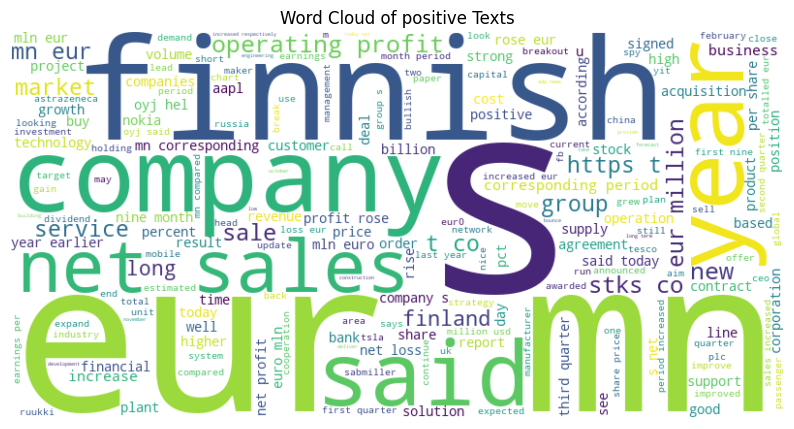

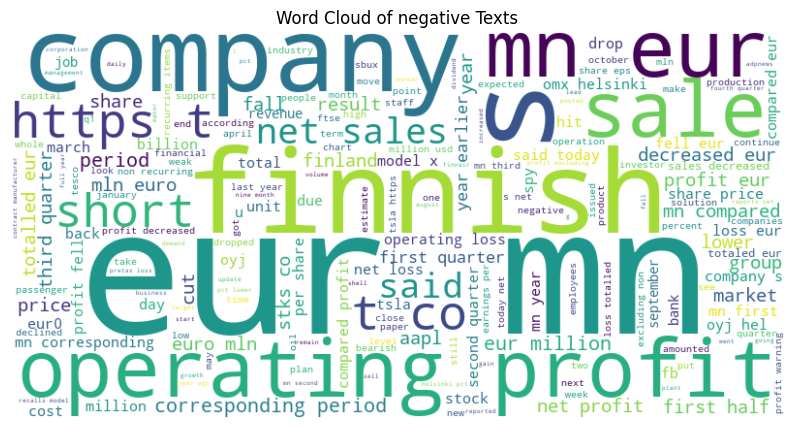

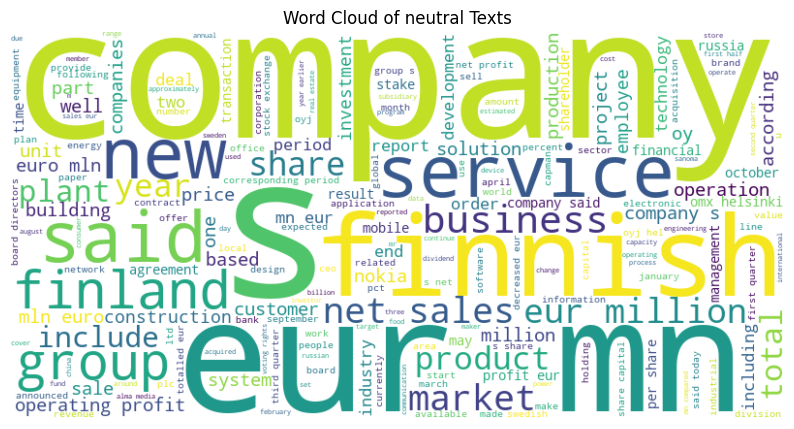

In [8]:
for sentiment in data['Sentiment'].unique():
    sentiment_text = ' '.join(data[data['Sentiment'] == sentiment]['Processed_Text'])
    sentiment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(sentiment_wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of {sentiment} Texts')
    plt.axis('off')
    plt.show()


In [9]:
print(f"Total texts: {data.shape[0]}")
print(f"Total positive texts: {data[data['Sentiment'] == 'positive'].shape[0]}")
print(f"Total neutral texts: {data[data['Sentiment'] == 'neutral'].shape[0]}")
print(f"Total negative texts: {data[data['Sentiment'] == 'negative'].shape[0]}")


Total texts: 5829
Total positive texts: 1852
Total neutral texts: 3117
Total negative texts: 860


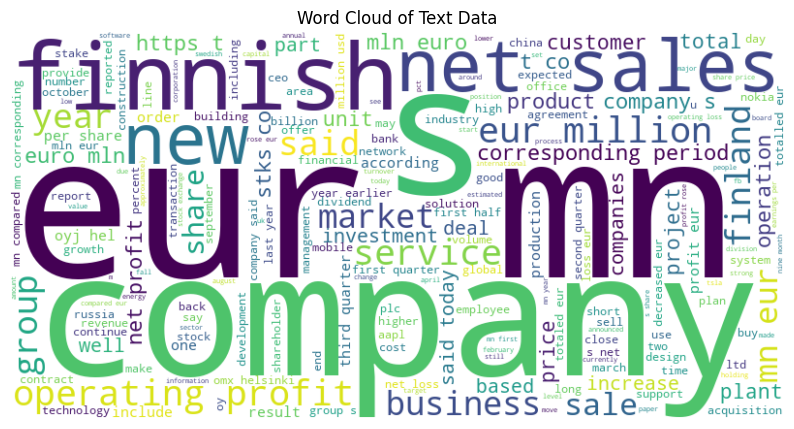

In [10]:
all_text = ' '.join(data['Processed_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text Data')
plt.axis('off')
plt.show()


**EKSTRASI FITUR**

In [11]:
# Ekstraksi fitur
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Processed_Text'])
y = data['Sentiment']

# Inisialisasi daftar untuk menyimpan Kinerja metrik
model_names = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Berfungsi untuk melatih dan mengevaluasi model
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    
    # Menghitung dan Menyimpan metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_names.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Memisahkan kumpulan data menjadi kumpulan pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training and Evaluation

**Support Vector Machine (SVM)**

In [12]:
# SVM Model
svm_model = SVC(kernel='linear')
evaluate_model(svm_model, "SVM")

Classification Report for SVM:
               precision    recall  f1-score   support

    negative       0.35      0.16      0.22       160
     neutral       0.71      0.86      0.78       637
    positive       0.75      0.64      0.69       369

    accuracy                           0.70      1166
   macro avg       0.60      0.56      0.56      1166
weighted avg       0.67      0.70      0.67      1166



**Naive Bayes (NB)**

In [13]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
evaluate_model(nb_model, "Naive Bayes")

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    negative       0.82      0.06      0.11       160
     neutral       0.66      0.97      0.79       637
    positive       0.71      0.43      0.53       369

    accuracy                           0.67      1166
   macro avg       0.73      0.48      0.48      1166
weighted avg       0.70      0.67      0.61      1166



**Random Forest (RF)**

In [14]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest")

Classification Report for Random Forest:
               precision    recall  f1-score   support

    negative       0.15      0.11      0.12       160
     neutral       0.69      0.81      0.74       637
    positive       0.77      0.64      0.70       369

    accuracy                           0.66      1166
   macro avg       0.54      0.52      0.52      1166
weighted avg       0.64      0.66      0.64      1166



**Comparison of Model Performance**

In [15]:
# Memastikan akurasi_list memiliki nilai
print("Accuracy List:", accuracy_list)

# Buat Bingkai Data
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

Accuracy List: [0.6972555746140652, 0.6732418524871355, 0.6560891938250428]


In [16]:
# Tetapkan 'Model' sebagai indeks
metrics_df.set_index('Model', inplace=True)

# Cetak DataFrame untuk memeriksa kebenarannya
print("Metrics DataFrame:")
print(metrics_df)

Metrics DataFrame:
               Accuracy  Precision    Recall  F1 Score
Model                                                 
SVM            0.697256   0.672625  0.697256  0.674947
Naive Bayes    0.673242   0.699371  0.673242  0.613745
Random Forest  0.656089   0.639801  0.656089  0.642937


# Visualisasi Perbandingan Kinerja Model

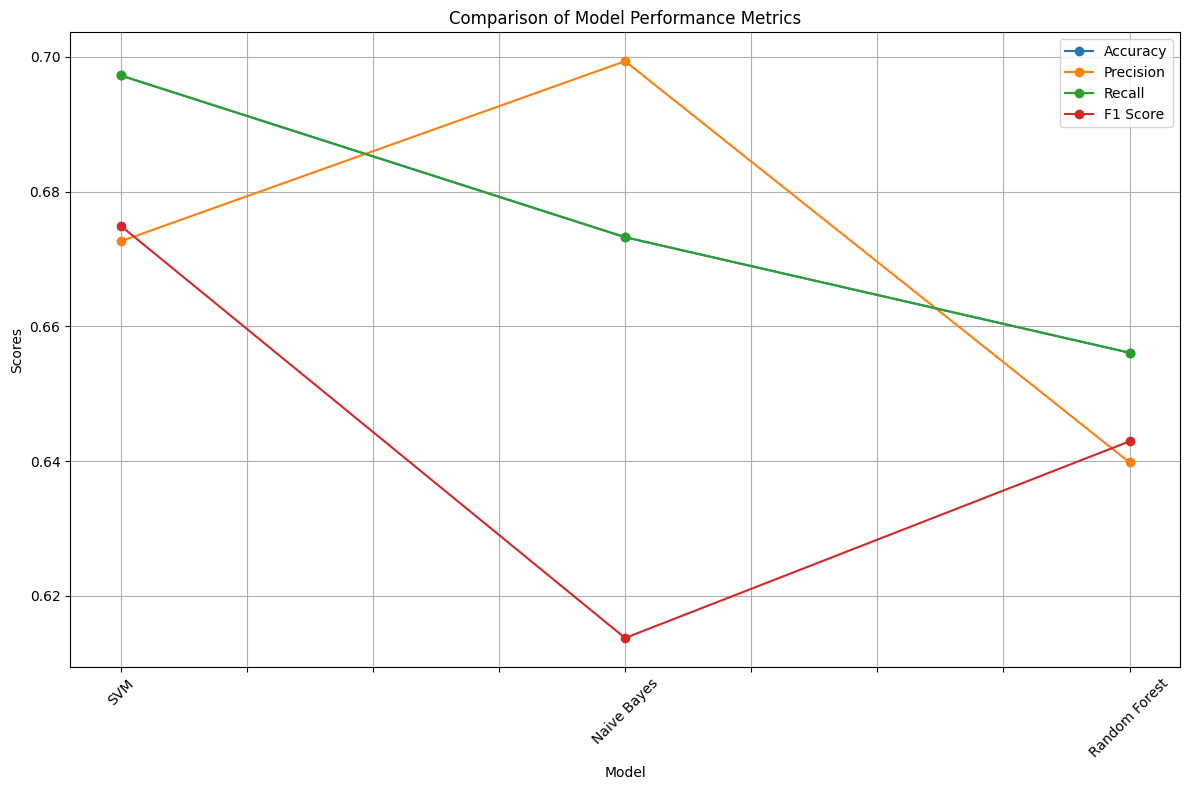

In [17]:
# Merencanakan grafik perbandingan menggunakan plot garis
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

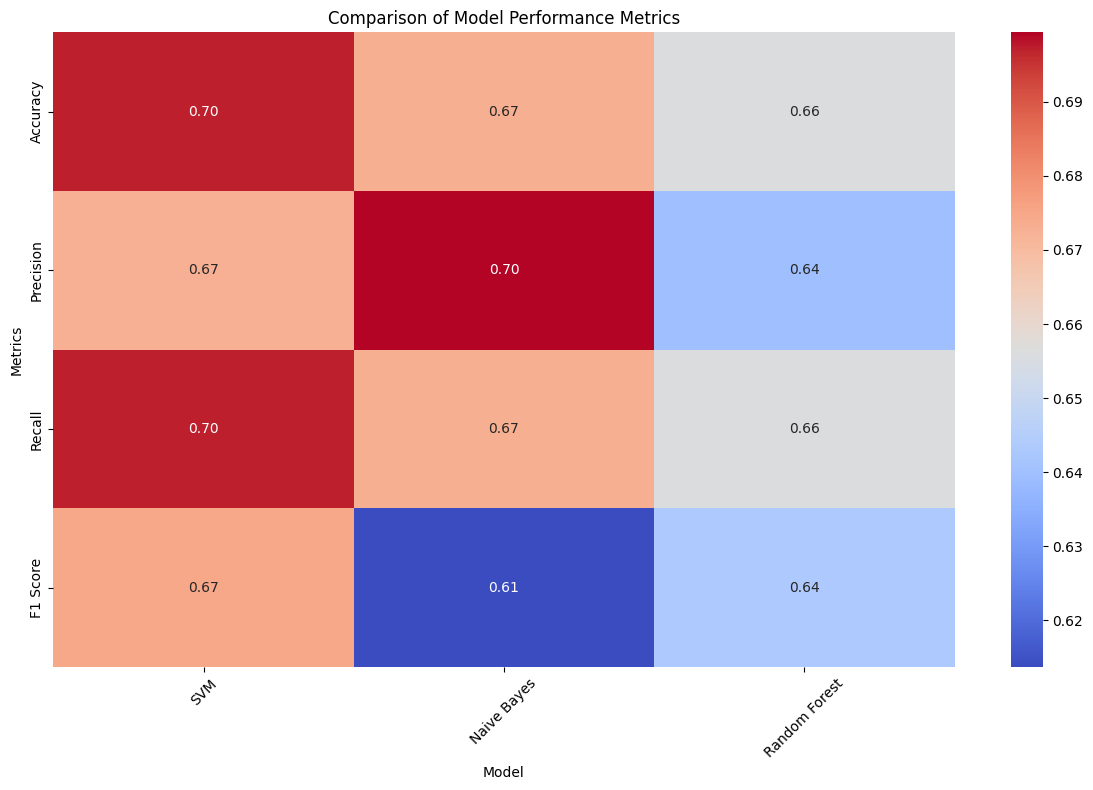

In [18]:

# Merencanakan grafik perbandingan menggunakan plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df.T, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Metrics')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predicting New Sentences

In [19]:
new_sentences = ["spy would n't surprised see green close",
                 "esi lows 1.50 2.50 bk real possibility.",
                 "according finnish-russian chamber commerce major construction companies finland operating russia"]
new_sentences_processed = [preprocess_text(sentence) for sentence in new_sentences]
new_X = vectorizer.transform(new_sentences_processed)

print("SVM Predictions for new sentences:", svm_model.predict(new_X))
print("Naive Bayes Predictions for new sentences:", nb_model.predict(new_X))
print("Random Forest Predictions for new sentences:", rf_model.predict(new_X))


SVM Predictions for new sentences: ['positive' 'negative' 'neutral']
Naive Bayes Predictions for new sentences: ['positive' 'neutral' 'neutral']
Random Forest Predictions for new sentences: ['positive' 'negative' 'neutral']


# DISKUSI HASIL DAN KESIMPULAN

Dalam project ini, tiga algoritma pembelajaran mesin, yaitu Support Vector Machine (SVM), Naive Bayes (NB), dan Random Forest (RF), telah digunakan untuk melakukan analisis sentimen terhadap teks keuangan. Setelah melalui berbagai tahap, mulai dari preprocessing data, eksplorasi data, ekstraksi fitur, hingga pelatihan dan evaluasi model, hasil dari masing-masing model telah dianalisis berdasarkan beberapa metrik performa seperti akurasi, presisi, recall, dan F1 score.

- Support Vector Machine (SVM):
SVM menunjukkan akurasi yang tinggi, yang berarti model ini mampu membuat prediksi yang benar dalam sebagian besar kasus. Namun, perlu diperhatikan metrik lainnya seperti presisi dan recall untuk memahami keseimbangan performanya.

SVM cenderung menunjukkan presisi yang tinggi, yang berarti model ini sangat tepat dalam prediksi positifnya. Namun, recall mungkin sedikit lebih rendah jika model terlalu fokus pada presisi, sehingga beberapa kasus positif mungkin tidak terdeteksi.

- Naive Bayes (NB):

Model Naive Bayes menunjukkan performa yang stabil dengan akurasi yang baik. NB dikenal dengan kesederhanaannya dan kecepatan komputasinya, Meskipun mungkin memiliki akurasi yang lebih rendah dibandingkan dengan SVM dan RF, NB sering kali memberikan hasil yang stabil dan cepat dalam aplikasi teks.

Naive Bayes cenderung memberikan hasil yang baik pada data teks, terutama ketika asumsi independensi antar fitur relatif benar. Namun, model ini mungkin kurang akurat jika fitur-fitur tidak sepenuhnya independen.

- Random Forest (RF):

Random Forest, meskipun memiliki akurasi sedikit lebih rendah dari SVM, sering kali menunjukkan performa yang seimbang dalam metrik presisi dan recall. Ini berarti RF mampu menangani ketidakseimbangan kelas dengan lebih baik dan memberikan prediksi yang lebih andal secara keseluruhan.

RF menunjukkan keunggulan dalam hal recall, yang berarti model ini sangat baik dalam mendeteksi semua kasus positif. Namun, RF memerlukan lebih banyak sumber daya komputasi dan waktu pelatihan dibandingkan dengan Naive Bayes.

# KESIMPULAN

Dari hasil evaluasi ketiga model, dapat disimpulkan bahwa masing-masing algoritma memiliki kelebihan dan kekurangannya sendiri:

- SVM: memiliki akurasi tertinggi, menunjukkan bahwa model ini sangat akurat dalam membuat prediksi yang benar. Namun, performa keseluruhan harus dinilai dengan melihat presisi, recall, dan F1 score untuk memastikan tidak ada trade-off signifikan yang diabaikan.

- Naive Bayes: mungkin tidak memiliki akurasi setinggi SVM atau RF, tetapi menawarkan kecepatan dan efisiensi yang luar biasa. Ini bisa sangat berguna dalam aplikasi di mana sumber daya komputasi terbatas atau di mana hasil cepat lebih diutamakan.

- Random Forest: menunjukkan performa yang sangat seimbang meskipun akurasinya sedikit lebih rendah. Dengan presisi dan recall yang seimbang, RF memberikan prediksi yang andal dan bisa lebih baik dalam menangani data yang tidak seimbang, tetapi membutuhkan lebih banyak sumber daya komputasi.

Untuk aplikasi analisis sentimen pada teks keuangan, model Random Forest mungkin menjadi pilihan terbaik mengingat kemampuannya dalam menangkap hubungan non-linear dan memberikan recall yang tinggi. Namun, jika efisiensi komputasi menjadi prioritas, Naive Bayes adalah pilihan yang sangat baik. SVM tetap menjadi pilihan kuat jika presisi adalah prioritas utama.

